<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_pruneTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given a binary tree where all nodes are either 0 or 1, prune the tree so that subtrees containing all 0s are removed.

For example, given the following tree:
```
   0
  / \
 1   0
    / \
   1   0
  / \
 0   0
 ```
should be pruned to:
```

   0
  / \
 1   0
    /
   1
```
We do not remove the tree at the root or its left child because it still has a 1 as a descendant.

##Solution:
To prune a binary tree so that subtrees containing all 0s are removed, we can use a recursive approach. We'll define a function that traverses the tree from bottom to top. For each node, we check if both its left and right subtrees are null (or effectively null after pruning), and the node's value is 0. If so, we remove this node by returning null to its parent. If the node or any of its descendants have a value of 1, we keep it. This approach ensures that we only remove subtrees that are entirely 0.


##Implementation:
Here's a Python function that demonstrates this algorithm:


In [1]:
class TreeNode:
    def __init__(self, value=0, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

def pruneTree(root):
    if root is None:
        return None

    # Recursively prune the left and right subtrees
    root.left = pruneTree(root.left)
    root.right = pruneTree(root.right)

    # If both left and right are None and node's value is 0, prune this node
    if root.value == 0 and root.left is None and root.right is None:
        return None

    return root

# Helper function to print the tree in pre-order traversal
def printTree(node, level=0):
    if node is not None:
        print(" " * (level * 2) + str(node.value))
        printTree(node.left, level + 1)
        printTree(node.right, level + 1)

# Construct the example tree
root = TreeNode(0)
root.left = TreeNode(1)
root.right = TreeNode(0)
root.right.left = TreeNode(1)
root.right.right = TreeNode(0)
root.right.left.left = TreeNode(0)
root.right.left.right = TreeNode(0)

print("Original Tree:")
printTree(root)

# Prune the tree
prunedRoot = pruneTree(root)

print("\nPruned Tree:")
printTree(prunedRoot)


Original Tree:
0
  1
  0
    1
      0
      0
    0

Pruned Tree:
0
  1
  0
    1


This code defines a `TreeNode` class for the binary tree nodes and includes a `pruneTree` function that implements the pruning logic. The `printTree` function is a helper to visualize the tree structure before and after pruning. The example constructs the given tree, prunes it according to the rule, and then prints the pruned tree to demonstrate the result.

In [ ]:
# Install the graphviz system package
!apt-get install graphviz libgraphviz-dev pkg-config

# Install pygraphviz Python package
!pip install pygraphviz

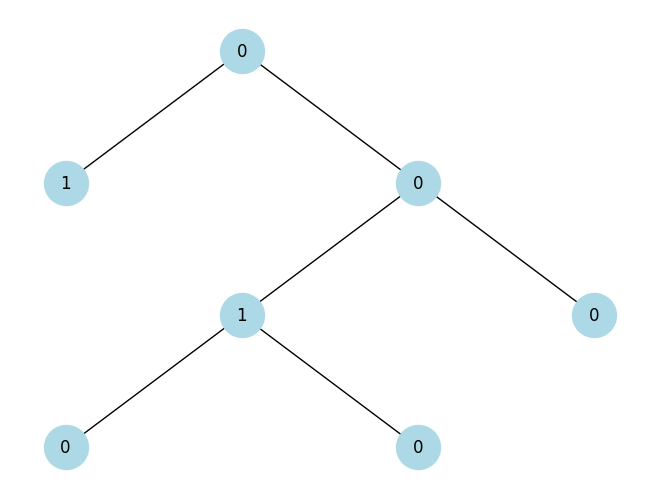

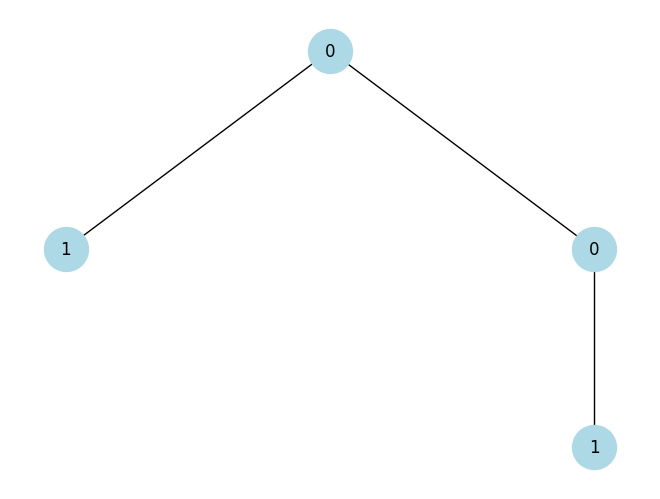

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import copy

class TreeNode:
    def __init__(self, id, value=0, left=None, right=None):
        self.id = id
        self.value = value
        self.left = left
        self.right = right

def pruneTree(node):
    if node is None:
        return None
    node.left = pruneTree(node.left)
    node.right = pruneTree(node.right)
    if node.value == 0 and node.left is None and node.right is None:
        return None
    return node

def add_nodes_edges(tree_node, G=None):
    if G is None:
        G = nx.DiGraph()
    if tree_node:
        G.add_node(tree_node.id, label=tree_node.value)
        if tree_node.left:
            G.add_edge(tree_node.id, tree_node.left.id)
            G = add_nodes_edges(tree_node.left, G)
        if tree_node.right:
            G.add_edge(tree_node.id, tree_node.right.id)
            G = add_nodes_edges(tree_node.right, G)
    return G

def draw_tree(tree_root):
    G = add_nodes_edges(tree_root)
    pos = graphviz_layout(G, prog='dot')
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=1000, node_color="lightblue", arrows=False)
    plt.show()

# Construct the example tree
root = TreeNode(1, 0)
root.left = TreeNode(2, 1)
root.right = TreeNode(3, 0)
root.right.left = TreeNode(4, 1)
root.right.right = TreeNode(5, 0)
root.right.left.left = TreeNode(6, 0)
root.right.left.right = TreeNode(7, 0)

# #If you want to work with the original tree then you need a deepcopy
# import copy

# # Make a deep copy of the root
# copyroot = copy.deepcopy(root)

# # Prune the tree
# pruned_root = pruneTree(root)

# # Draw the original tree
# draw_tree(copyroot)

# # Draw the pruned tree
# draw_tree(pruned_root)

#If you arehappy being shallow, then only the order of ops is mandated
draw_tree(root)

# Prune the tree
pruned_root = pruneTree(root)

# Draw the pruned tree
draw_tree(pruned_root)
